In [3]:
# Importing the libraries
import tensorflow                # Import TensorFlow, a deep learning framework for building and training neural networks
import numpy as np               # Import NumPy for numerical operations and array handling
import pandas as pd              # Import pandas for data manipulation and analysis (works with DataFrames)
import matplotlib.pyplot as plt  # Import matplotlib for plotting and visualizing data
import seaborn as sns            # Import seaborn, a visualization library built on top of matplotlib (provides prettier plots)

tensorflow.__version__

'2.16.2'

In [5]:
# -----------------------------
# Loading the MNIST 0-9 dataset
# -----------------------------

# Import the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# train_data: 60,000 images, each 28x28 grayscale pixels with pixel values 0–255
# train_labels: 60,000 digit labels ranging from 0 to 9
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Text(0.5, 1.0, 'Class: 7')

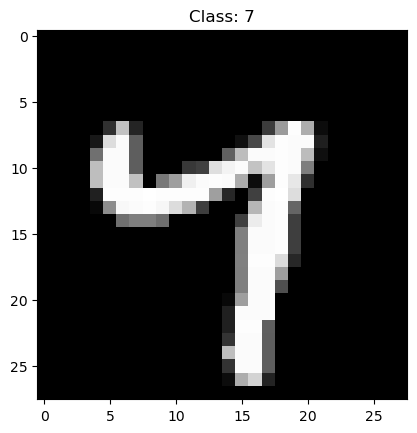

In [7]:
# Combine training and testing data into a single dataset
digits_data = np.vstack([train_data, test_data])        # Stack images vertically
digits_labels = np.hstack([train_labels, test_labels])  # Stack labels horizontally

# Display the randomly selected digit image
index = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[index], cmap="gray")
plt.title("Class: " + str(digits_labels[index]))

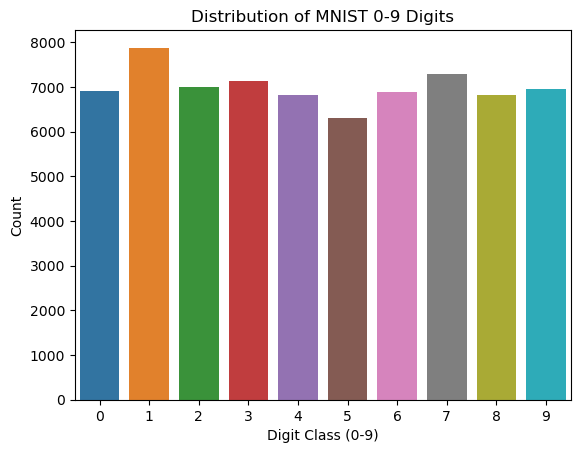

In [9]:
# Visualize the distribution of all digit classes using Seaborn
sns.countplot(x=pd.Series(digits_labels))
plt.xlabel("Digit Class (0-9)")
plt.ylabel("Count")
plt.title("Distribution of MNIST 0-9 Digits")
plt.show()

In [11]:
# ------------------------------
# Loading the Kaggle A-Z dataset
# ------------------------------

import requests  # Import requests to download files from the web
import zipfile   # Import zipfile to work with compressed .zip archives

# Send HTTP GET request to download the file
url = "https://iaexpert.academy/arquivos/alfabeto_A-Z.zip"
response = requests.get(url)

# Save the downloaded content as a local file
with open("alfabeto_A-Z.zip", "wb") as f:
    f.write(response.content)

# Open the downloaded ZIP file in read mode
with zipfile.ZipFile(file = "alfabeto_A-Z.zip", mode = "r") as zip_object:
    # Extract all contents of the ZIP file into the current directory
    zip_object.extractall("./")

# Load the CSV dataset into a Pandas DataFrame and convert all values to float32
dataset_az = pd.read_csv("A_Z Handwritten Data.csv").astype("float32")

# This dataset has 785 columns:
# - The first column ("0") contains the labels (0 = A, 1 = B, ..., 25 = Z).
# - The remaining 784 columns represent the pixel values of 28x28 grayscale images,
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Separate features (pixel values) from labels
alphabet_data = dataset_az.drop("0", axis = 1)  # Drop the first column '0' which contains the labels to get only the pixel data
alphabet_labels = dataset_az["0"]               # Store the labels (first column) in a separate variable

# Reshape the flat pixel data into 28x28 images
alphabet_data = np.reshape(a = alphabet_data.values, newshape = (alphabet_data.shape[0], 28, 28))

# train_data: 372,450 images, each 28x28 grayscale pixels with pixel values 0–255
# train_labels: 372,450 alphabet labels ranging from 0 to 25 for letters A–Z
alphabet_data.shape, alphabet_labels.shape

((372450, 28, 28), (372450,))

Text(0.5, 1.0, 'Class: 2.0')

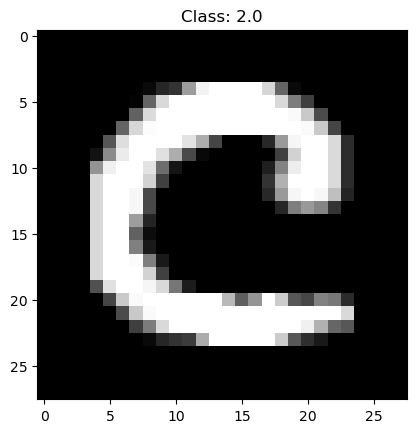

In [15]:
# Display the randomly selected alphabet image
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = "gray")
plt.title("Class: " + str(alphabet_labels[index]))

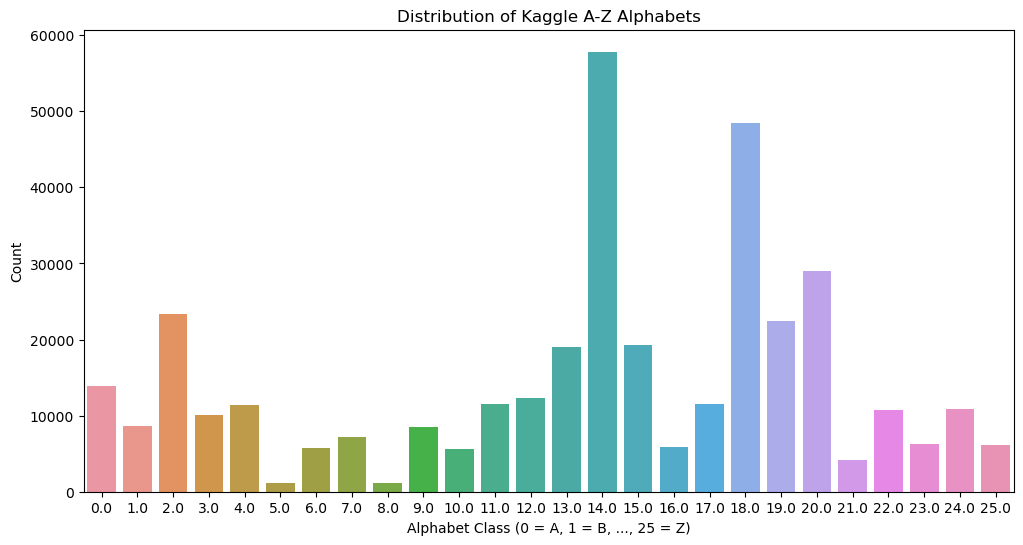

In [17]:
# Visualize the distribution of all alphabet classes using Seaborn
plt.figure(figsize = (12, 6))
sns.countplot(x = pd.Series(alphabet_labels))
plt.xlabel("Alphabet Class (0 = A, 1 = B, ..., 25 = Z)")
plt.ylabel("Count")
plt.title("Distribution of Kaggle A-Z Alphabets")
plt.show()

In [19]:
# --------------------
# Joining the datasets
# --------------------

print(np.unique(digits_labels))    # Show unique classes in the digit labels (0–9)
print(np.unique(alphabet_labels))  # Show unique classes in the alphabet labels (0–25 for A–Z)

alphabet_labels += 10              # Shift alphabet labels by +10 so they don't overlap with digits
print(np.unique(alphabet_labels))  # Now digits = 0–9, alphabets = 10–35

# Combine alphabet and digit data into a single dataset
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])
np.unique(labels)

[0 1 2 3 4 5 6 7 8 9]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35.]


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

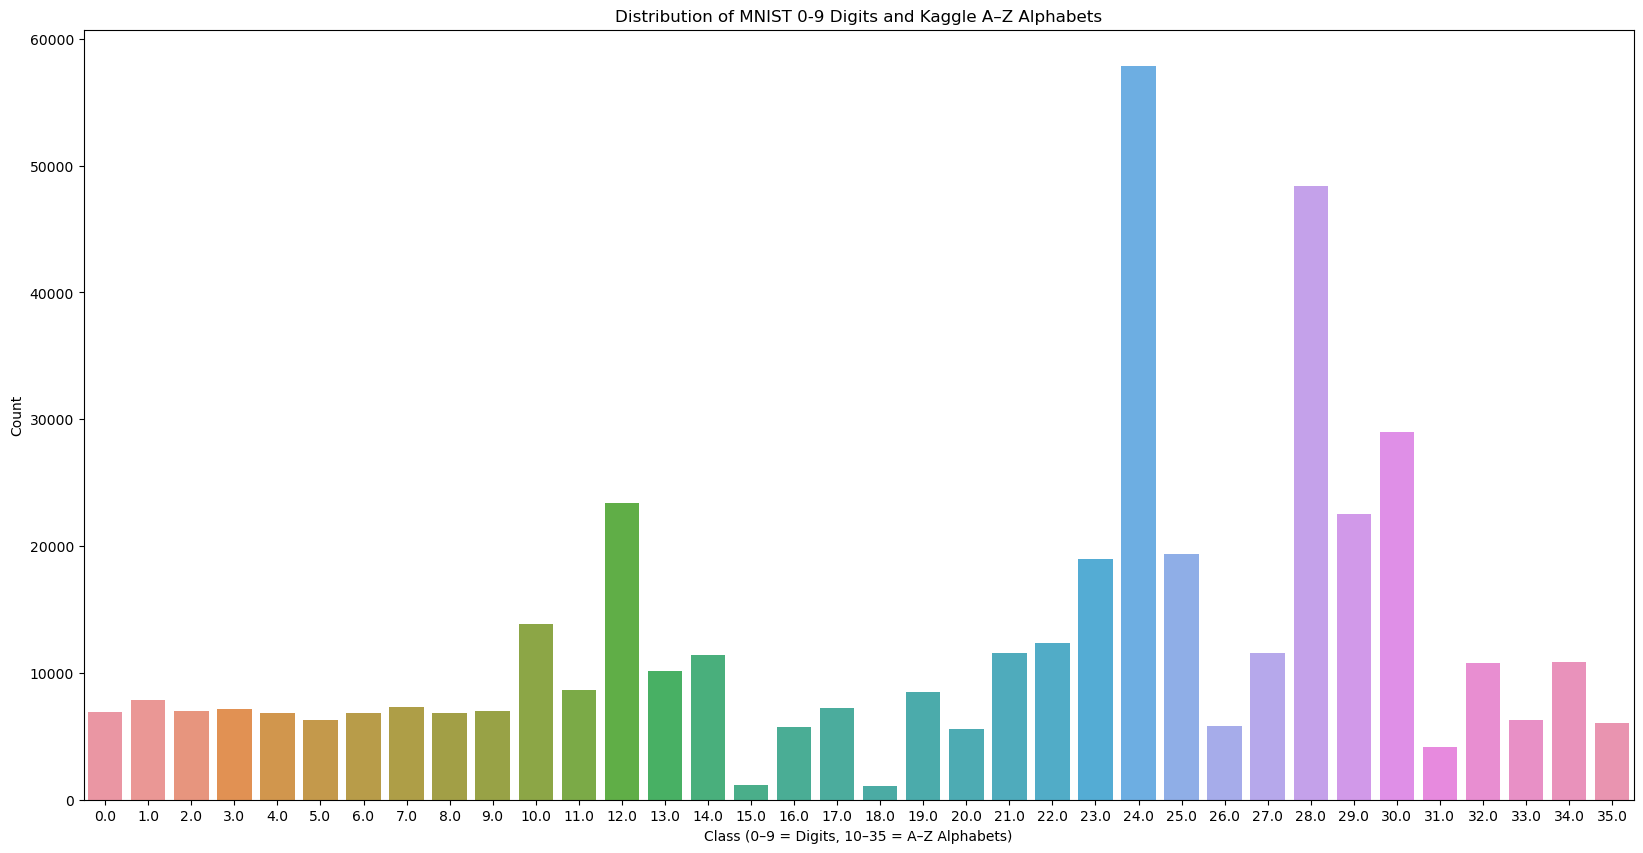

In [21]:
# Visualize the combined label distribution
plt.figure(figsize = (20, 10))
sns.countplot(x = pd.Series(labels))
plt.xlabel("Class (0–9 = Digits, 10–35 = A–Z Alphabets)")
plt.ylabel("Count")
plt.title("Distribution of MNIST 0-9 Digits and Kaggle A–Z Alphabets")
plt.show()